# Pipe Line
    Data Loader
    Data Preparation
    Data Visualization
    Data Imputation
    Feature selection and feature importance
    Models
    Models after SMOTE

# Data Loader

^..^=   =^..^ =^..^=    =^..^= =^..^=   =^..^ =^..^=    =^..^=


In [1]:
# importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [2]:
# Reading data
df= pd.read_csv('training_data.csv')
pd.reset_option('max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
# Data exploration
print(df.describe())
print(df.info())
print(df.shape)

         Patient ID      Height      Weight  Additional ID
count    942.000000  826.000000  837.000000     140.000000
mean   66624.319533  110.800242   23.632756   58208.735714
std    16966.858912   30.000607   15.453337   10216.094378
min     2530.000000   35.000000    2.300000   23625.000000
25%    50263.250000   89.000000   12.500000   50092.000000
50%    68452.500000  115.000000   20.400000   50661.500000
75%    84938.500000  133.000000   31.200000   68466.250000
max    85349.000000  180.000000  110.800000   85234.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                942 non-null    int64  
 1   Recording locations:      942 non-null    object 
 2   Age                       868 non-null    object 
 3   Sex                       942 non-null    object 
 4   Height                    826

Patient ID                    0
Recording locations:          0
Age                          74
Sex                           0
Height                      116
Weight                      105
Pregnancy status              0
Murmur                        0
Murmur locations            763
Most audible location       763
Systolic murmur timing      764
Systolic murmur shape       764
Systolic murmur grading     764
Systolic murmur pitch       764
Systolic murmur quality     764
Diastolic murmur timing     937
Diastolic murmur shape      937
Diastolic murmur grading    937
Diastolic murmur pitch      937
Diastolic murmur quality    937
Outcome                       0
Campaign                      0
Additional ID               802
dtype: int64
Axes(0.125,0.11;0.775x0.77)


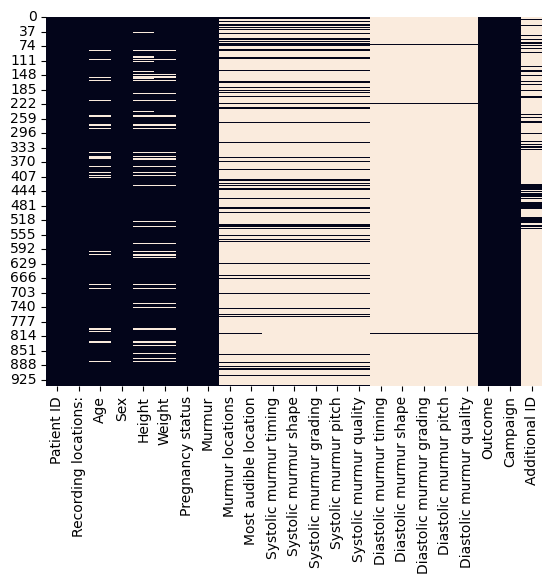

In [4]:
# Null values and heat map for null values
print(df.isnull().sum())
print(sns.heatmap(df.isnull(), cbar=False))


# location of null values 
# print('Null values locations for age',np.where(df['Age'].isnull())[0])
# print('Null values locations for Height ',np.where(df['Height'].isnull())[0])
# print('Null values locations for Weight',np.where(df['Weight'].isnull())[0])



In [5]:
print(df.nunique()) # unique values in the data

Patient ID                  942
Recording locations:         28
Age                           4
Sex                           2
Height                      132
Weight                      435
Pregnancy status              2
Murmur                        3
Murmur locations             17
Most audible location         4
Systolic murmur timing        4
Systolic murmur shape         4
Systolic murmur grading       3
Systolic murmur pitch         3
Systolic murmur quality       3
Diastolic murmur timing       1
Diastolic murmur shape        1
Diastolic murmur grading      3
Diastolic murmur pitch        3
Diastolic murmur quality      2
Outcome                       2
Campaign                      2
Additional ID               140
dtype: int64


In [6]:
# Locate unknown murmur rows
unknown =df['Murmur'] == 'Unknown'
df.loc[unknown]
# Drop unknown values from Murmur
df = df[~unknown]
df.Murmur.unique()

array(['Absent', 'Present'], dtype=object)

# Data Prepration
^V^V^V^V^V^V^V^V^V^V^V^V^V^V^V^V^V^V^V^V^V^V^V^V^V^V^V^V^V^V^

In [7]:
# Filling data by making 0 always good/Normal and 1 always bad/ Abnormal. 
# outcome 0 is normal and 1 is abnormal 
df['Outcome'] = df['Outcome'].replace(['Normal'],0)
df['Outcome'] = df['Outcome'].replace(['Abnormal'],1)
# Murmur Absent =0, Murmur present= 1, Murmur = unknown
df['Murmur'] = df['Murmur'].replace(['Absent'],0)
df['Murmur'] = df['Murmur'].replace(['Present'],1)

# pREGENANCY absent=0 and pregency present =1
df['Pregnancy status'] = df['Pregnancy status'].replace([False],0)
df['Pregnancy status'] = df['Pregnancy status'].replace([True],1)

# Age for child=0, adolescent=1, infant=2, Neonate=3
df['Age'] = df['Age'].replace(['Child'],0)
df['Age'] = df['Age'].replace(['Adolescent'],1)
df['Age'] = df['Age'].replace(['Infant'],2)
df['Age'] = df['Age'].replace(['Neonate'],3)

# Gender male =0 and female =1
df['Sex'] = df['Sex'].replace(['Female'],0)
df['Sex'] = df['Sex'].replace(['Male'],1)

In [8]:
# Selecting Relevant colomns
# Most of the columns we can ignore because they have large number of null values
df= df[['Patient ID','Recording locations:','Age','Sex', 'Height',
         'Weight', 'Pregnancy status', 'Murmur', 'Outcome',]]
df.head(100)


,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Outcome
0,2530,AV+PV+TV+MV,0.0,0,98.0,15.90,0,0,1
1,9979,AV+PV+TV+MV,0.0,0,103.0,13.10,0,1,1
3,13918,AV+PV+TV+MV,0.0,1,98.0,15.90,0,1,1
4,14241,AV+PV+TV+MV,0.0,1,87.0,11.20,0,1,1
5,14998,AV+PV+TV+MV,0.0,1,NaN,NaN,0,0,1
6,23625,AV+PV+TV+MV,0.0,0,92.0,14.00,0,0,1
7,24160,AV+PV+TV+MV,0.0,0,98.0,17.66,0,0,1
8,29045,AV+PV+TV+MV,0.0,0,88.0,12.50,0,1,1
10,31737,AV+PV+TV+MV,0.0,0,90.0,14.40,0,0,1
11,33151,AV+PV+TV+MV,0.0,0,141.0,30.90,0,1,1


# Data Visulization
>< >< >< >< >< >< >< >< >< >< >< >< >< >< >< >< >< >< >< ><

C:\Users\rajni\AppData\Local\Temp\ipykernel_2160\1386169390.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df1.hist(ax=ax, bins= 30)


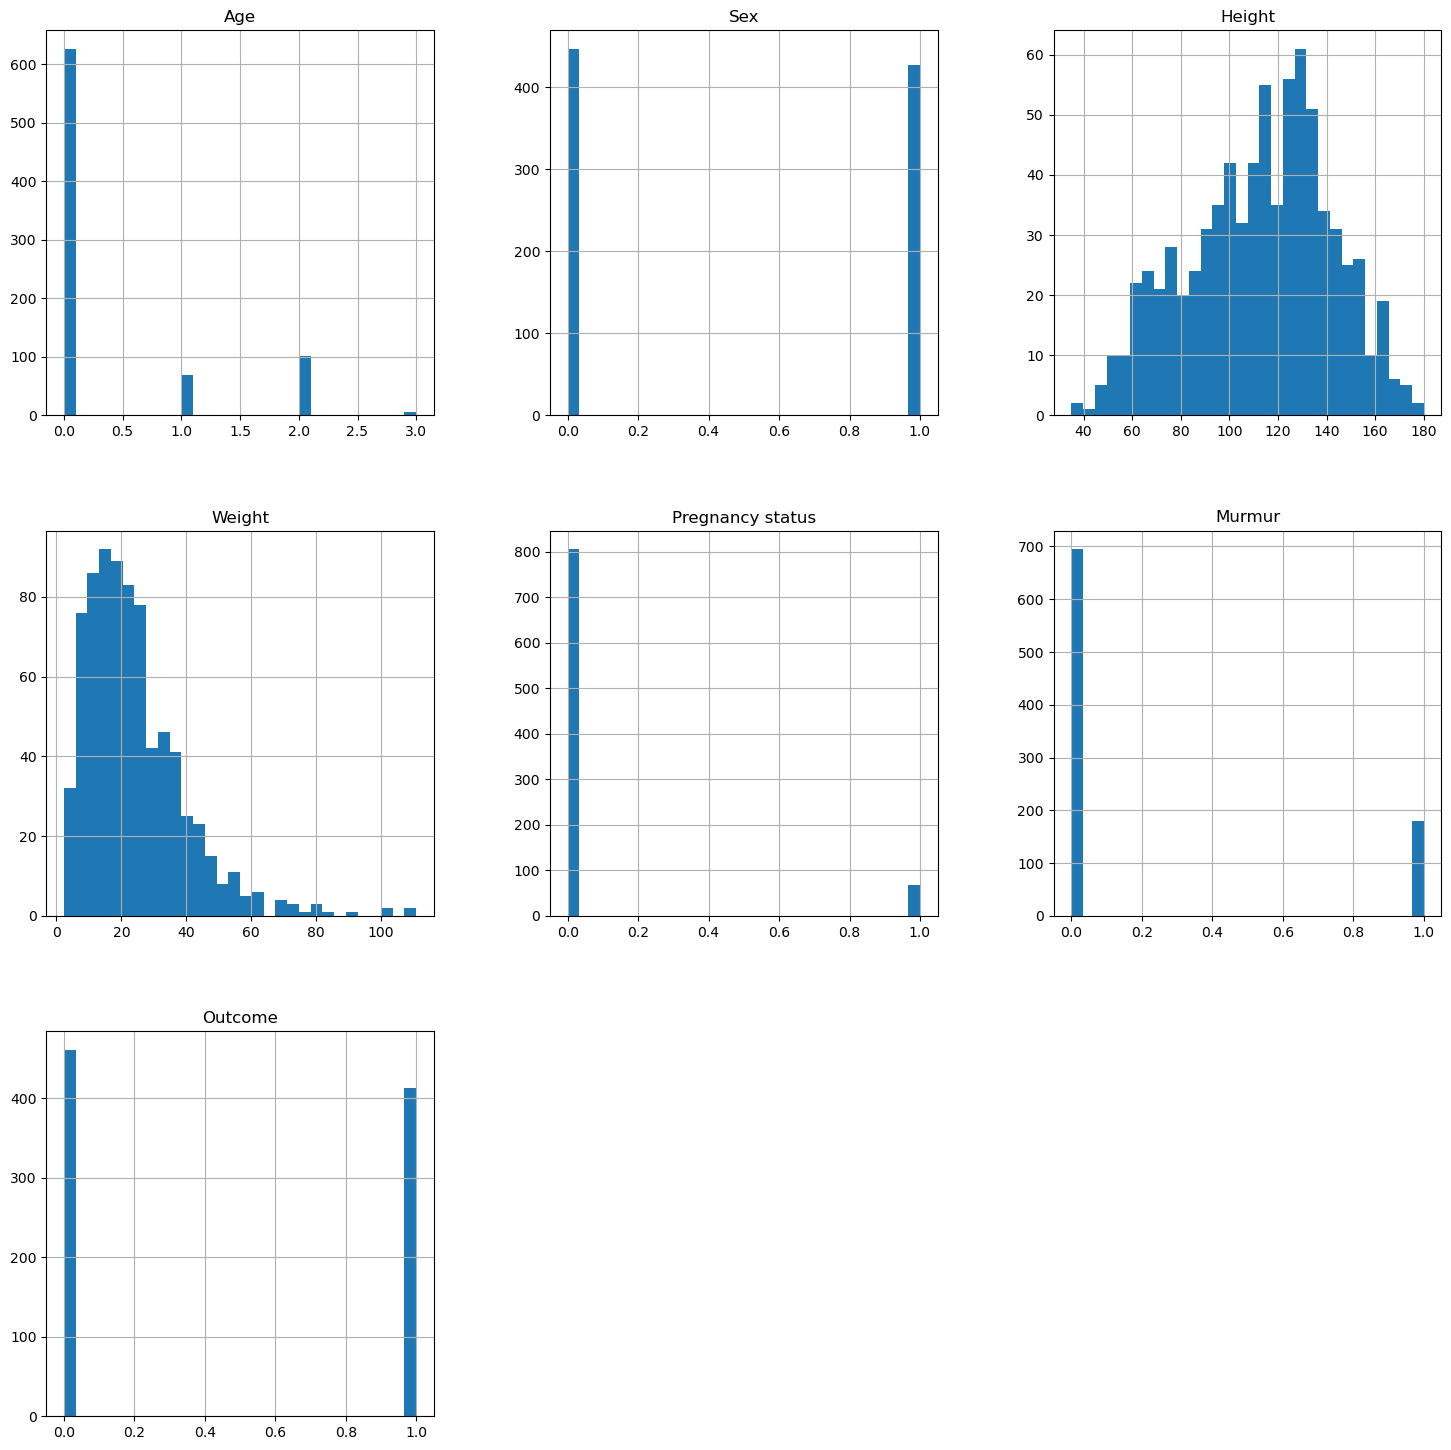

In [9]:
# Histrograms for distribution of numerical variables. 

df1=df[['Age','Sex', 'Height',
         'Weight', 'Pregnancy status', 'Murmur', 'Outcome',]]

# Visualization
fig=plt.figure(figsize= (18, 18))
ax= fig.gca()
df1.hist(ax=ax, bins= 30)
plt.show()

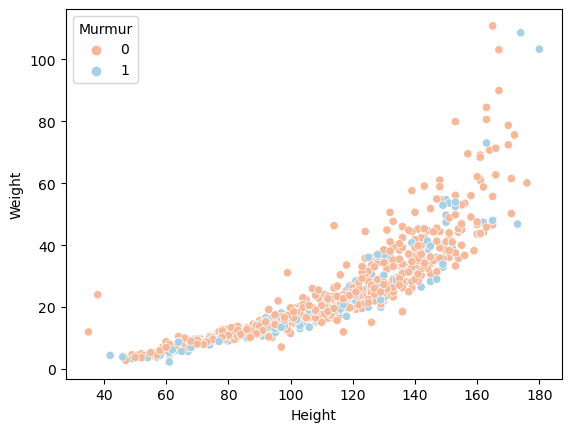

In [10]:
# Scatter plots
# Height and weight have an almost linear kind of relationship except for outliers. 
sns.scatterplot(data=df1, x='Height', y='Weight',  hue='Murmur', palette='RdBu')
plt.show()

C:\Users\rajni\anaconda3\anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


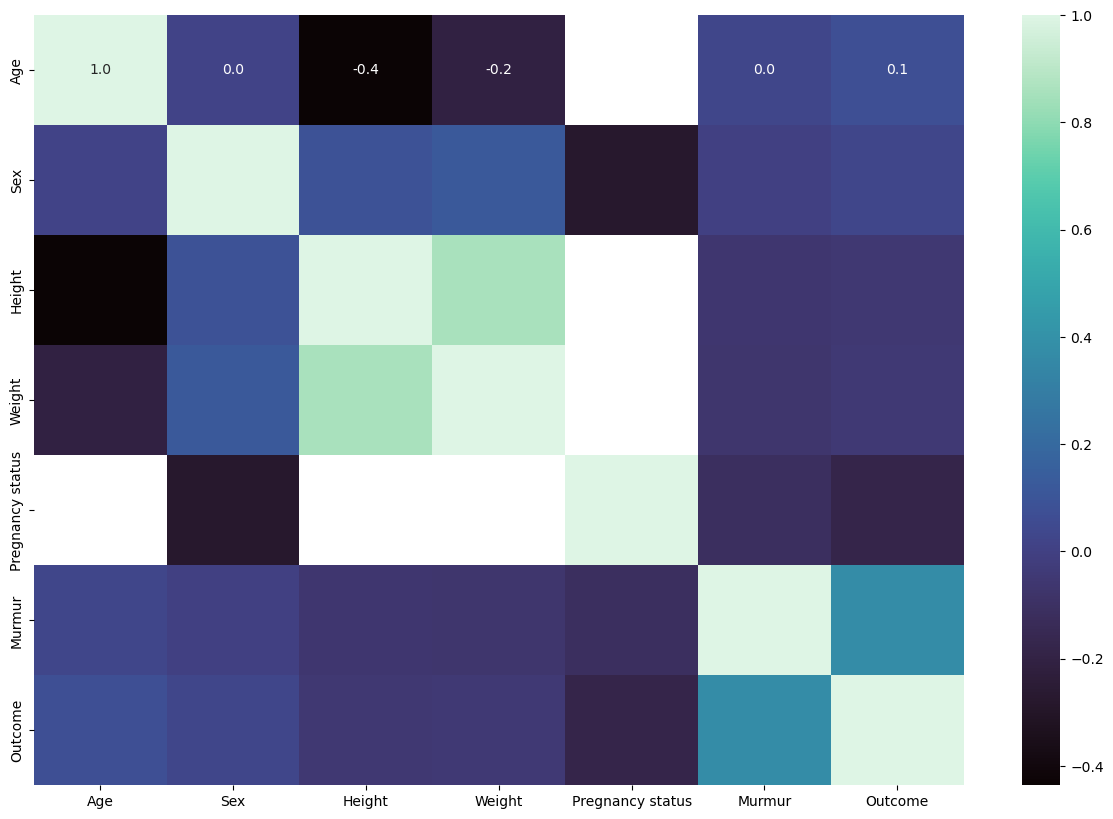

In [11]:
# Visualization correlation 
f, ax = plt.subplots(figsize=(15, 10))
corr = df1.corr()

ax = sns.heatmap(corr, annot=True, cmap='mako', fmt=".1f", ax=ax)
plt.show()

# Data Imputation
<<>><<>><<>><<>><<>><<>><<>><<>><<>><<>><<>><<>><<>><<>><<>>

In [12]:
# MCAR Test
df1=df[['Patient ID','Age','Sex', 'Height',
         'Weight', 'Pregnancy status', 'Murmur', 'Outcome',]]

from pyampute.exploration.mcar_statistical_tests import MCARTest
mt = MCARTest(method="little")
print(mt.little_mcar_test(df1))

0.0


In [13]:
# KNN Imputation

knn_imputer = KNNImputer(n_neighbors=2)
knn_imputer.fit(df1)
Imputed_KNN = knn_imputer.transform(df1)
df_impute_KNN= pd.DataFrame(Imputed_KNN, columns=df1.columns)
# printing data
print(df_impute_KNN.head(10))
print(df_impute_KNN.isna().sum())

   Patient ID  Age  Sex  Height  Weight  Pregnancy status  Murmur  Outcome
0      2530.0  0.0  0.0    98.0   15.90               0.0     0.0      1.0
1      9979.0  0.0  0.0   103.0   13.10               0.0     1.0      1.0
2     13918.0  0.0  1.0    98.0   15.90               0.0     1.0      1.0
3     14241.0  0.0  1.0    87.0   11.20               0.0     1.0      1.0
4     14998.0  0.0  1.0    92.5   13.55               0.0     0.0      1.0
5     23625.0  0.0  0.0    92.0   14.00               0.0     0.0      1.0
6     24160.0  0.0  0.0    98.0   17.66               0.0     0.0      1.0
7     29045.0  0.0  0.0    88.0   12.50               0.0     1.0      1.0
8     31737.0  0.0  0.0    90.0   14.40               0.0     0.0      1.0
9     33151.0  0.0  0.0   141.0   30.90               0.0     1.0      1.0
Patient ID          0
Age                 0
Sex                 0
Height              0
Weight              0
Pregnancy status    0
Murmur              0
Outcome             0

# Feature Selection and feature improtance
--<>--<>--<>--<>--<>--<>--<>--<>--

In [14]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression 

In [15]:
# Embedding method 

X = df_impute_KNN[['Age', 'Height', 'Weight', 'Pregnancy status', 'Outcome']]
y = df_impute_KNN['Murmur']
# Initialize the RFE feature selector with a logistic regression model
model = LogisticRegression() 
rfe_selector = RFE(model, n_features_to_select=3)   # find which feature has most impact

# Fit the selector to your data
X_new = rfe_selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = rfe_selector.get_support(indices=True)

# Print the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]
print("Selected features:", selected_feature_names)


Selected features: Index(['Age', 'Pregnancy status', 'Outcome'], dtype='object')


C:\Users\rajni\AppData\Local\Temp\ipykernel_2160\381526171.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


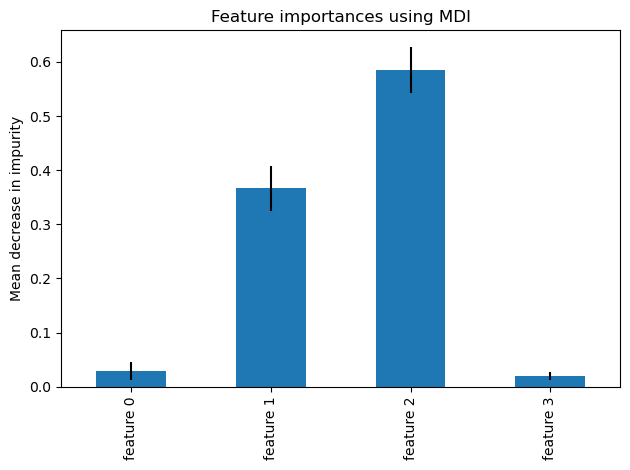

In [16]:
# Feature importance

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Generate a synthetic dataset with 3 informative features
X = df_impute_KNN[['Age', 'Height', 'Weight','Pregnancy status', ]]
y = df_impute_KNN[['Murmur']]

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Fit a random forest classifier
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

# Compute feature importances based on mean decrease in impurity
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# Plot the impurity-based importance
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Compute feature importances based on feature permutation
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

# Models
^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^-^

In [17]:
# Train test split
X = df_impute_KNN[['Age', 'Height', 'Weight','Pregnancy status' ]]
y = df_impute_KNN[['Murmur']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=4)
# Convert y_train and y_test to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(699, 4)
(175, 4)
(699,)
(175,)


In [18]:
# unique values in the data
print(df_impute_KNN.nunique())

Patient ID          874
Age                   6
Sex                   2
Height              166
Weight              464
Pregnancy status      2
Murmur                2
Outcome               2
dtype: int64


In [19]:
# print(df_impute_KNN.head(100))

In [20]:
# SVM
import numpy as np

import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.metrics import classification_report

clf = svm.SVC(kernel="linear", C=3)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87       134
         1.0       0.00      0.00      0.00        41

    accuracy                           0.77       175
   macro avg       0.38      0.50      0.43       175
weighted avg       0.59      0.77      0.66       175



C:\Users\rajni\anaconda3\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajni\anaconda3\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajni\anaconda3\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# MLP
from sklearn.neural_network import MLPClassifier

clf_MLP = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf_MLP.fit(X_train, y_train)

y_pred=clf_MLP.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87       134
         1.0       0.00      0.00      0.00        41

    accuracy                           0.77       175
   macro avg       0.38      0.50      0.43       175
weighted avg       0.59      0.77      0.66       175



C:\Users\rajni\anaconda3\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajni\anaconda3\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajni\anaconda3\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87       134
         1.0       0.00      0.00      0.00        41

    accuracy                           0.77       175
   macro avg       0.38      0.50      0.43       175
weighted avg       0.59      0.77      0.66       175



C:\Users\rajni\anaconda3\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajni\anaconda3\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajni\anaconda3\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# nearest neighbors classification
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
y_pred= knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84       134
         1.0       0.25      0.07      0.11        41

    accuracy                           0.73       175
   macro avg       0.51      0.50      0.48       175
weighted avg       0.65      0.73      0.67       175



In [24]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Get the parameters of the DecisionTreeClassifier
params = clf.get_params()
print(params)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73       134
         1.0       0.19      0.22      0.20        41

    accuracy                           0.59       175
   macro avg       0.47      0.46      0.47       175
weighted avg       0.62      0.59      0.60       175



In [25]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_jobs=1)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.76      0.84      0.79       134
         1.0       0.19      0.12      0.15        41

    accuracy                           0.67       175
   macro avg       0.47      0.48      0.47       175
weighted avg       0.62      0.67      0.64       175



# Models after Using SMOTE

As we can see models are not able to predict properly becauses of data imbalance. SMOTE is a method by which this problem can be solved.

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming df_impute_KNN contains your original data
X = df_impute_KNN[['Age', 'Height', 'Weight', 'Pregnancy status',]]
y = df_impute_KNN['Murmur']  # Assuming 'Murmur' is your target column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(X_train_smote.shape)
print(X_test.shape)
print(y_train_smote.shape)
print(y_test.shape)

(1116, 4)
(175, 4)
(1116,)
(175,)


In [27]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(n_jobs=1)

# Train the model on the oversampled data
xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.79      0.69      0.73       137
         1.0       0.23      0.34      0.28        38

    accuracy                           0.61       175
   macro avg       0.51      0.51      0.51       175
weighted avg       0.67      0.61      0.63       175



In [28]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train_smote, y_train_smote)

# Get the parameters of the DecisionTreeClassifier
params = clf.get_params()
print(params)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
              precision    recall  f1-score   support

         0.0       0.77      0.65      0.71       137
         1.0       0.20      0.32      0.24        38

    accuracy                           0.58       175
   macro avg       0.49      0.48      0.48       175
weighted avg       0.65      0.58      0.61       175



In [29]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_smote, y_train_smote)
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.36      0.51       137
         1.0       0.25      0.76      0.38        38

    accuracy                           0.45       175
   macro avg       0.55      0.56      0.44       175
weighted avg       0.72      0.45      0.48       175



In [30]:
# MLP
from sklearn.neural_network import MLPClassifier
clf_MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(7, 13), random_state=1)
clf_MLP.fit(X_train_smote, y_train_smote)

y_pred=clf_MLP.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.45      0.59       137
         1.0       0.28      0.76      0.41        38

    accuracy                           0.51       175
   macro avg       0.57      0.60      0.50       175
weighted avg       0.74      0.51      0.55       175



In [31]:
# nearest neighbors classification
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_smote, y_train_smote)
knn.score(X_test, y_test)
y_pred= knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.64      0.71       137
         1.0       0.25      0.42      0.31        38

    accuracy                           0.59       175
   macro avg       0.52      0.53      0.51       175
weighted avg       0.68      0.59      0.63       175



In [32]:
# SVM
import numpy as np

import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.metrics import classification_report

clf = svm.SVC(kernel="linear", C=3)
clf.fit(X_train_smote, y_train_smote)

y_pred=clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.22      0.35       137
         1.0       0.24      0.87      0.37        38

    accuracy                           0.36       175
   macro avg       0.55      0.54      0.36       175
weighted avg       0.72      0.36      0.35       175

